In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv
import pandas as pd
import numpy as np

In [2]:
# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline 
from seaborn import countplot, axes_style
import seaborn as sns

In [3]:
from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

# To Scale our data
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
import math
from sklearn import metrics
import itertools
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

In [4]:
#Exploratory data analysis

In [5]:
#Onboarding the dataset
dataset = pd.read_csv('creditcard.csv')
dataset.head()
dataset= dataset.copy(deep= True)

In [6]:
dataset.shape

(284807, 31)

In [7]:
#columns in dataset and their corresponding data types
dataset.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
class_count = dataset['Class'].value_counts()
class_count

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
Non_Fraud=class_count[0]/dataset['Class'].count()*100
print("Non-Fraud Transaction Percentage:", round(Non_Fraud,3))
Fraud=class_count[1]/dataset['Class'].count()*100
print("Fraud Transaction Percentage:", round(Fraud,3))

Non-Fraud Transaction Percentage: 99.827
Fraud Transaction Percentage: 0.173


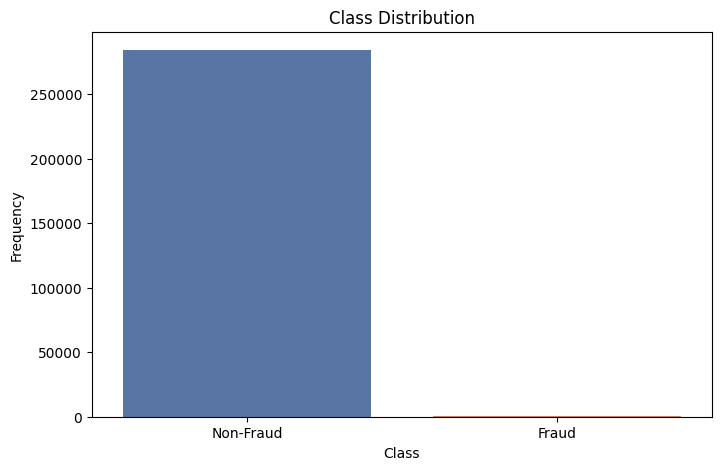

In [12]:
#Plotting the class distribution
plt.figure(figsize=(8,5))
sns.countplot(x = "Class", palette='deep', data = dataset)
plt.xticks(rotation = 0)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution")
dataset["Class"].value_counts()
labels = ["Non-Fraud", "Fraud"]
plt.xticks(range(2), labels)
plt.show()

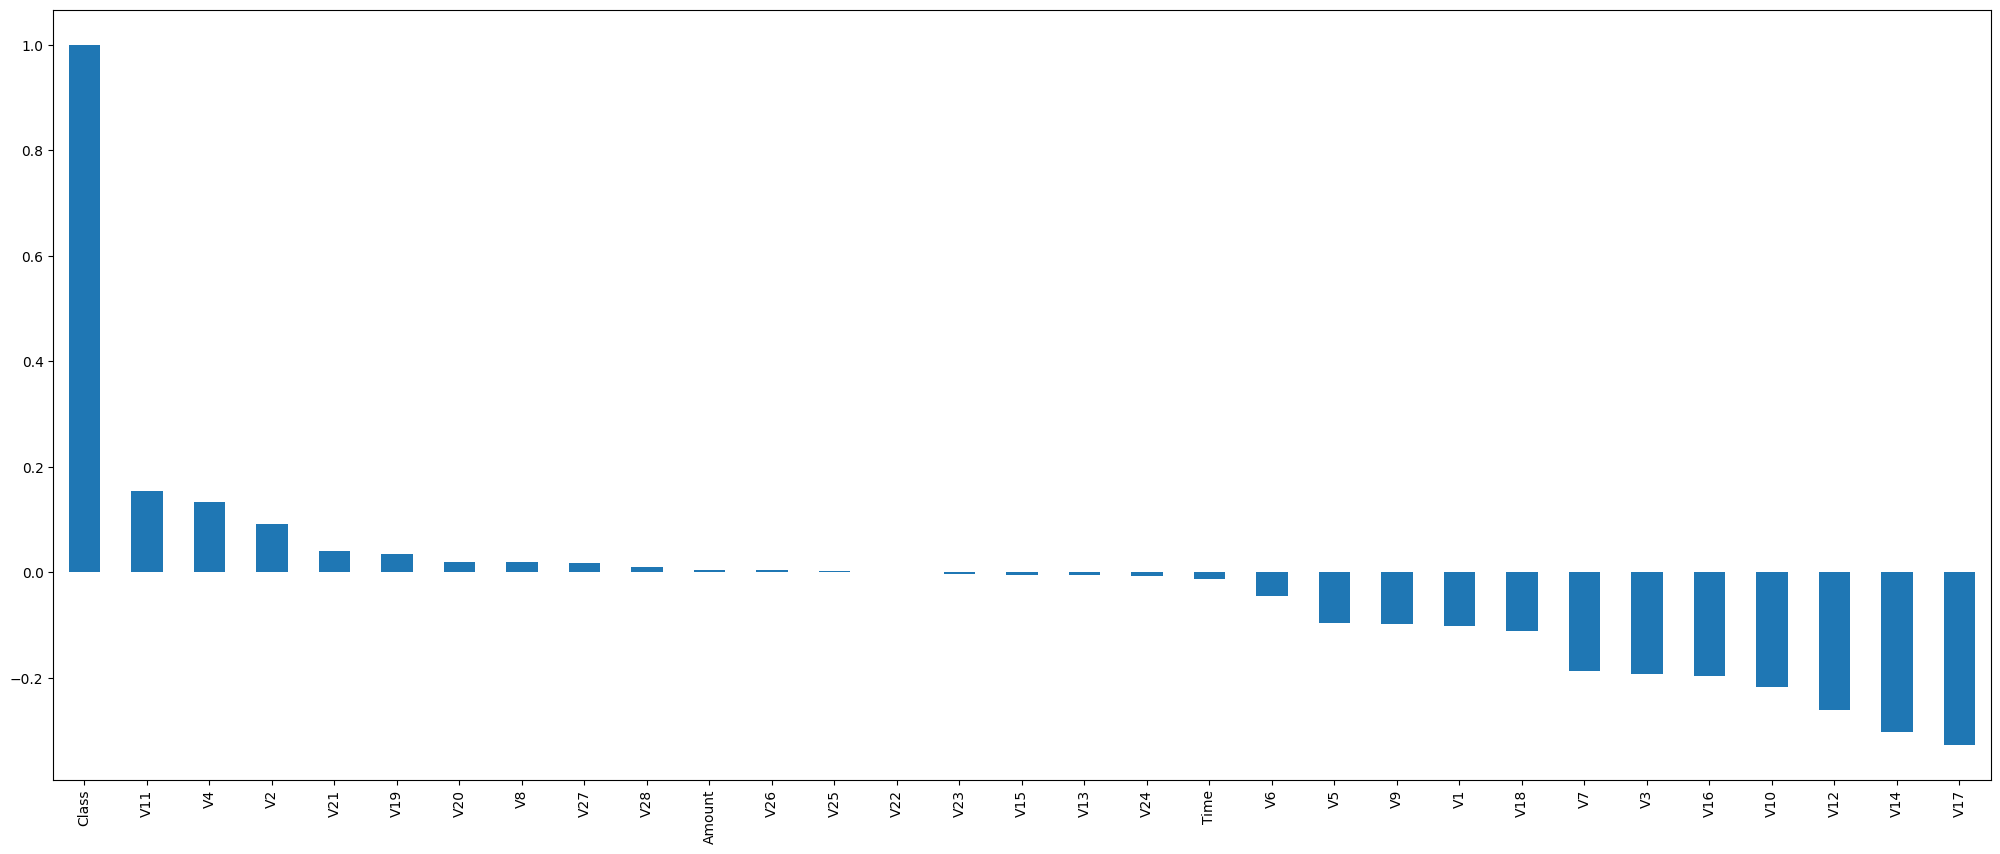

In [13]:
#To check the highly correlated features with the cust_churned feature. 
plt.figure(figsize=(25,10))
dataset.corr()['Class'].sort_values(ascending = False).plot(kind='bar')
plt.show()

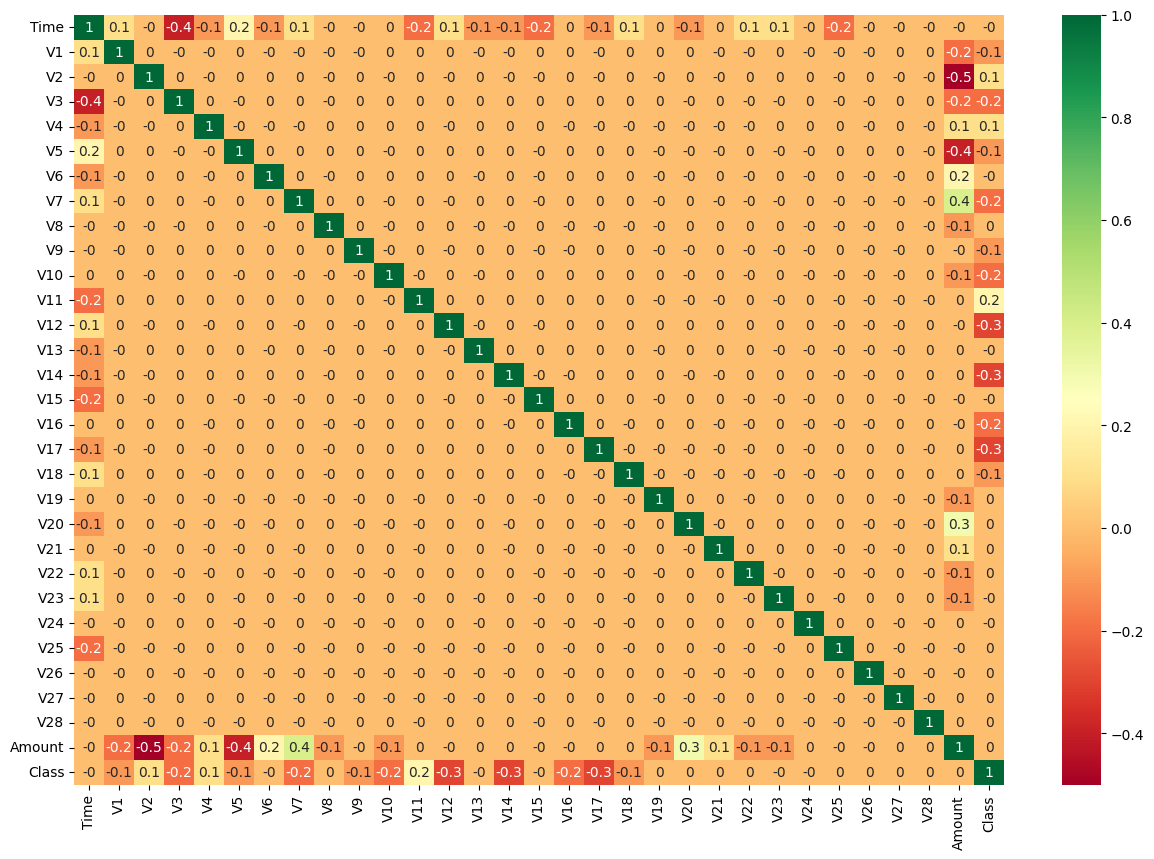

In [14]:
# Checking the correlation among features using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(round(dataset.corr(method ='pearson'),1),annot=True,cmap='RdYlGn')
plt.show()

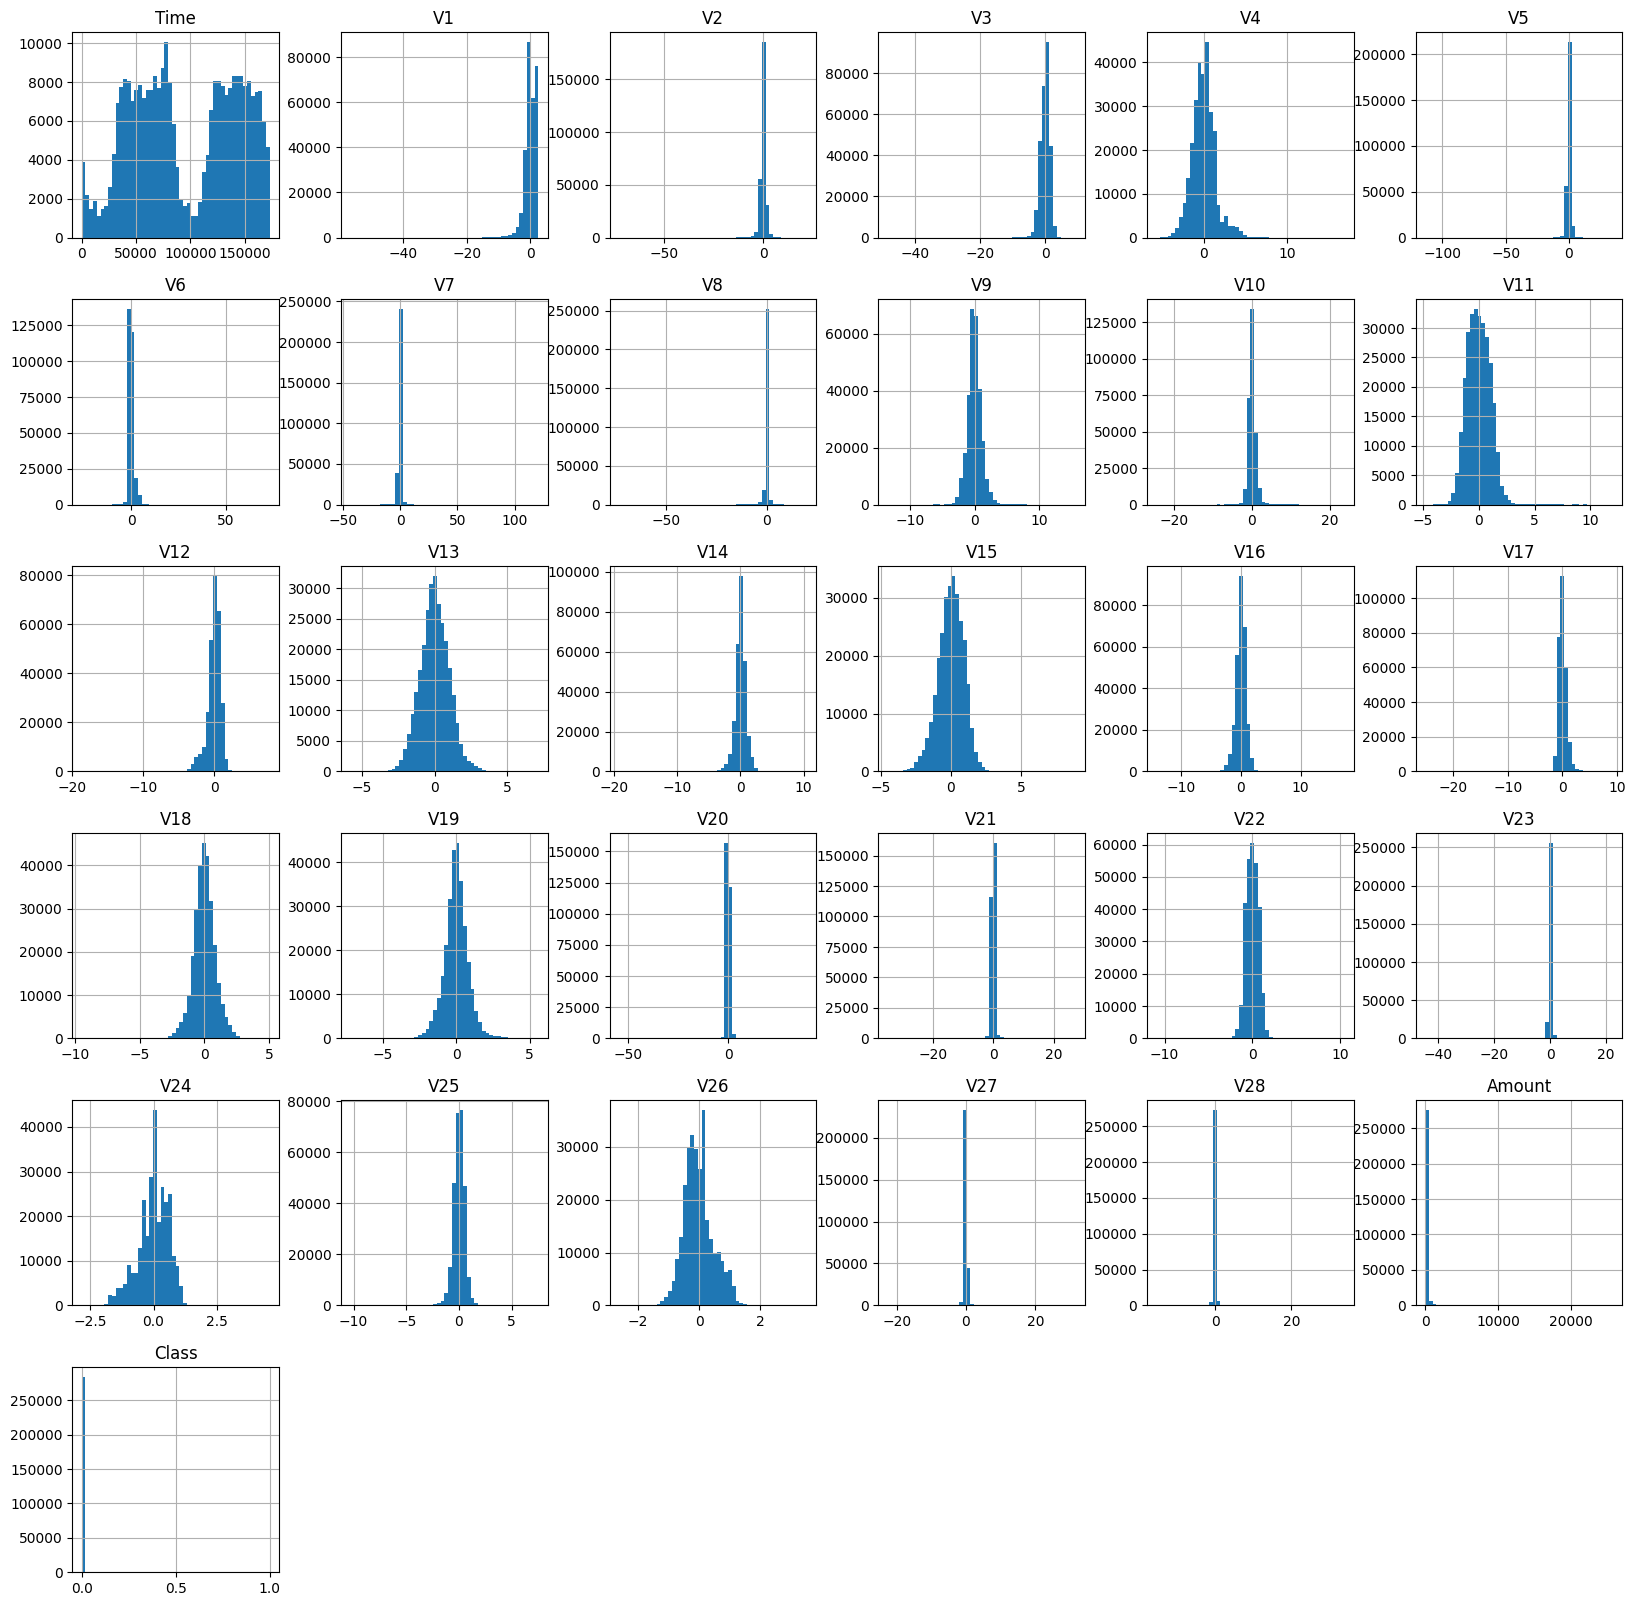

In [15]:
# Univariate Analysis of features
# Plotting histograms
dataset.hist(bins=50,figsize=(20,20))
plt.show()

In [16]:
# Checking the frequency of Fraud Transactions with respect to time
plt.figure(figsize = (10,5))
sns.distplot(dataset['Time'].loc[dataset['Class']==1],bins = int(math.sqrt(len(dataset['Time'].loc[dataset['Class']==1]))*2), color='red')
plt.title("Time distribution for Fraud Transactions", fontsize=21)

# Checking the frequency of Non-Fraud Transactions with respect to time
plt.figure(figsize = (10,5))
sns.distplot(dataset['Time'].loc[dataset['Class']==0],bins = int(math.sqrt(len(dataset['Time'].loc[dataset['Class']==0]))*2), color = 'blue')
plt.title("Time distribution for Non-Fraud Transactions", fontsize=21)

Text(0.5, 1.0, 'Time distribution for Non-Fraud Transactions')

In [17]:
# Checking the Amount distribution for both the classes
plt.figure(figsize = (10,8))
sns.distplot(dataset['Amount'].loc[dataset['Class']==1],bins = int(math.sqrt(len(dataset['Amount'].loc[dataset['Class']==1]))*2), color='blue')
sns.distplot(dataset['Amount'].loc[dataset['Class']==0],bins = int(math.sqrt(len(dataset['Amount'].loc[dataset['Class']==0]))*2), color = 'red')
plt.title("Amount distribution for both classes", fontsize=21)

Text(0.5, 1.0, 'Amount distribution for both classes')

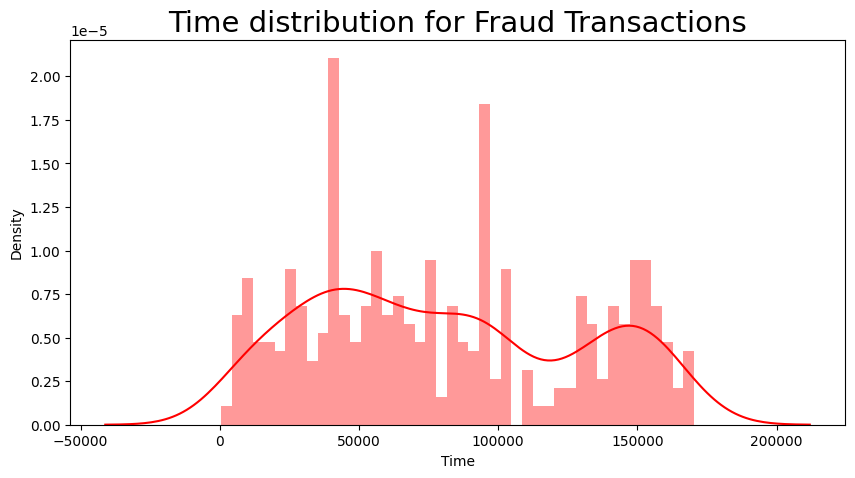

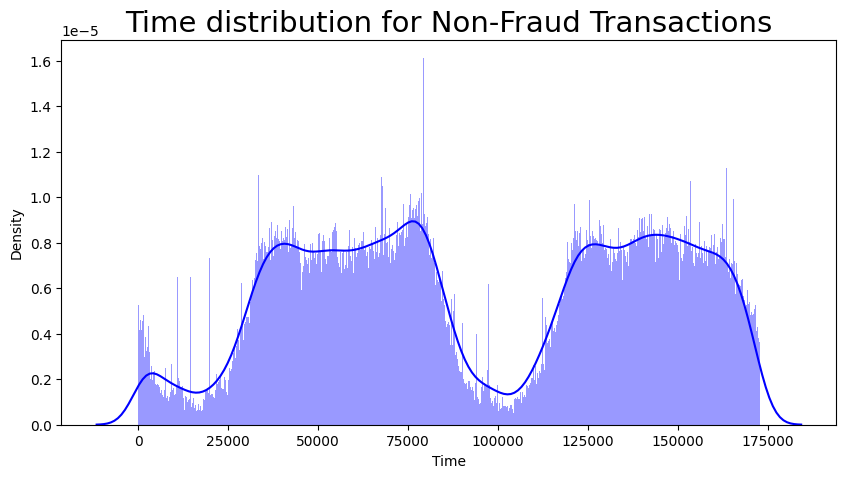

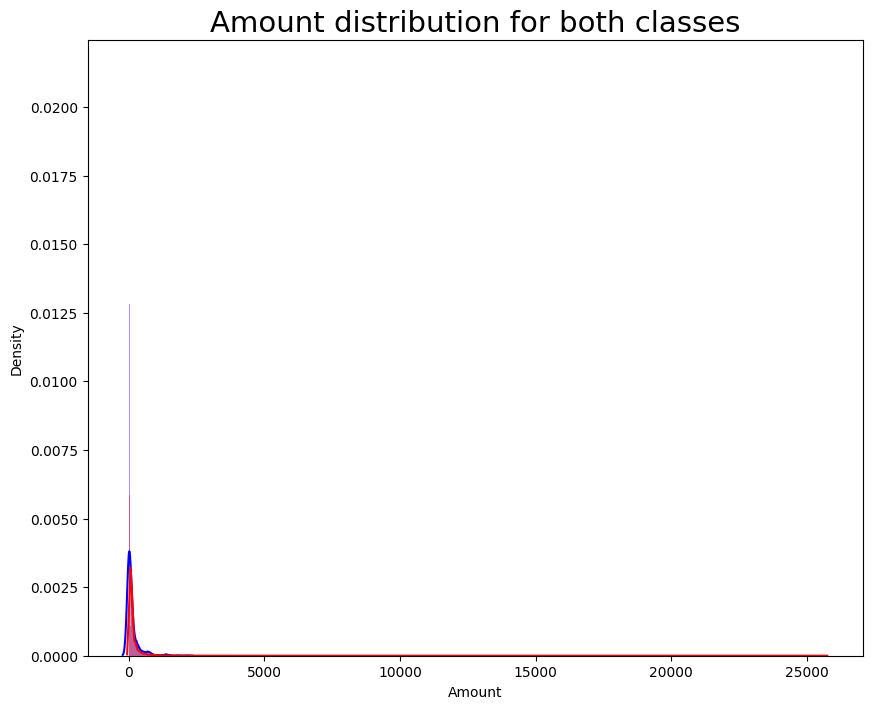

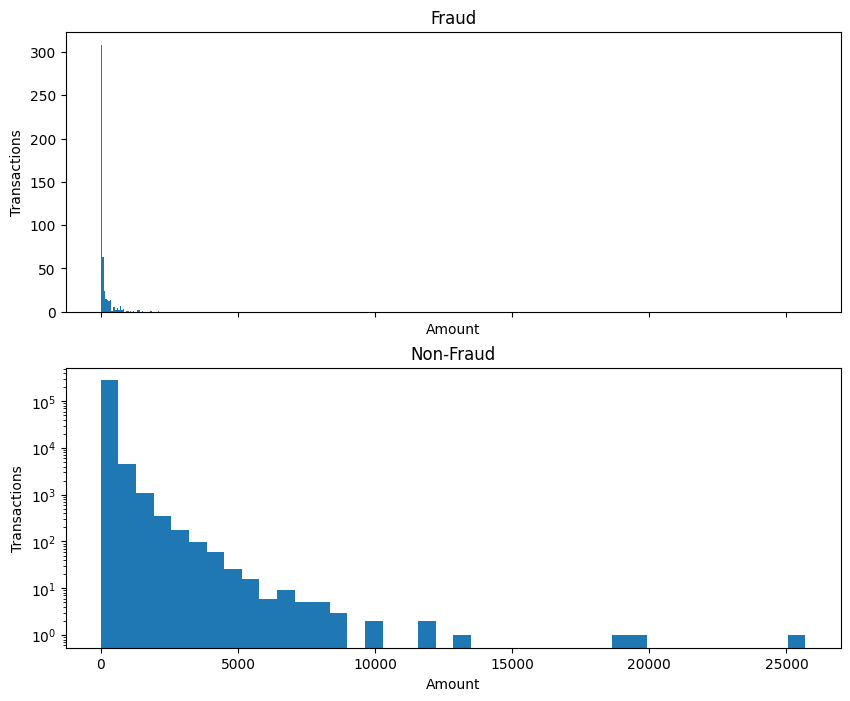

In [18]:
#To understand how different the amount is in case of fraud and non-fraud
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8)) 
bins = 40
ax1.hist(dataset.Amount[dataset.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax1.set_ylabel('Transactions')
ax1.set_xlabel('Amount')

ax2.hist(dataset.Amount[dataset.Class == 0], bins = bins)
ax2.set_title('Non-Fraud')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Transactions')
plt.yscale('log')
plt.show()

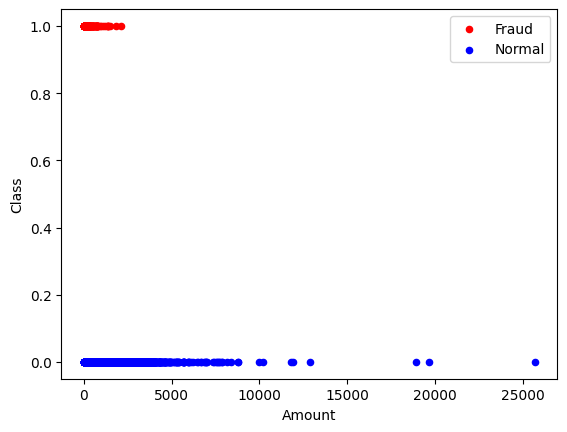

In [19]:
fraud_dataset = dataset.loc[dataset['Class'] == 1]
Nonfraud_dataset = dataset.loc[dataset['Class'] == 0]
ax = fraud_dataset.plot.scatter(x='Amount', y='Class', c='Red', label='Fraud')
Nonfraud_dataset.plot.scatter(x='Amount', y='Class', c='Blue', label='Normal', ax=ax)
plt.show()

In [20]:
#Checking Outliers
def outlier(features):
    plt.figure(figsize=(20,5))
    features = features
    for i in enumerate(features):
        ax = plt.subplot(1,8, i[0]+1)
        sns.boxplot(i[1], data = dataset)

In [21]:
features1 = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']
features2 = ['V8', 'V9', 'V10', 'V11', 'V12', 'V13','V14', 'V15']
features3 = ['V16', 'V17', 'V18', 'V18', 'V19','V20', 'V21', 'V22']
features4 = ['V23', 'V24', 'V25', 'V26','V27','V28','Amount']

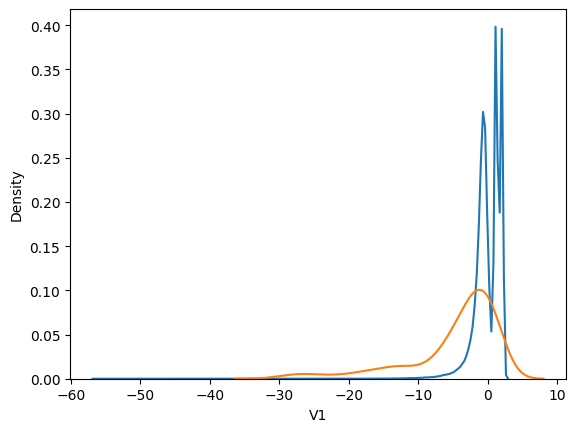

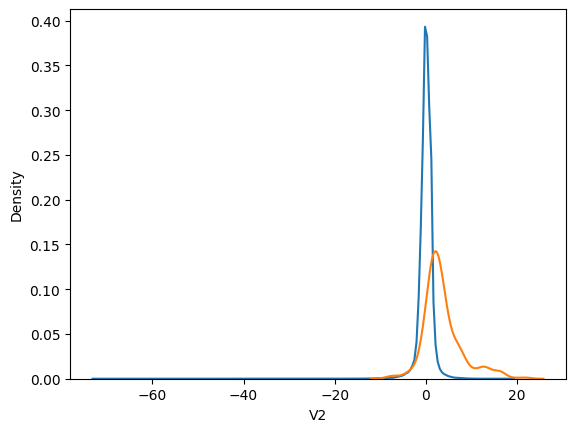

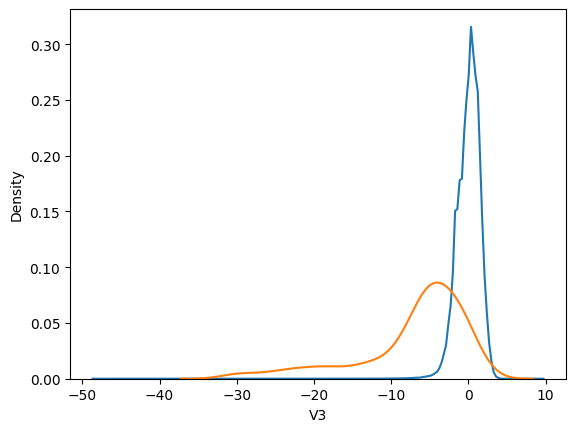

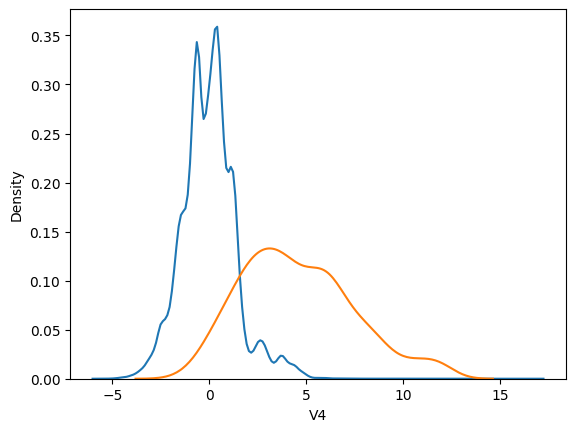

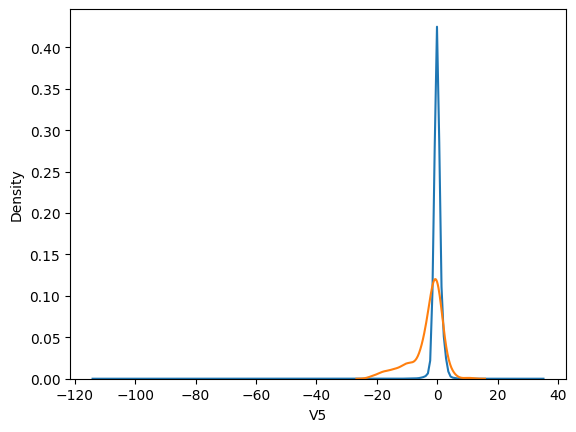

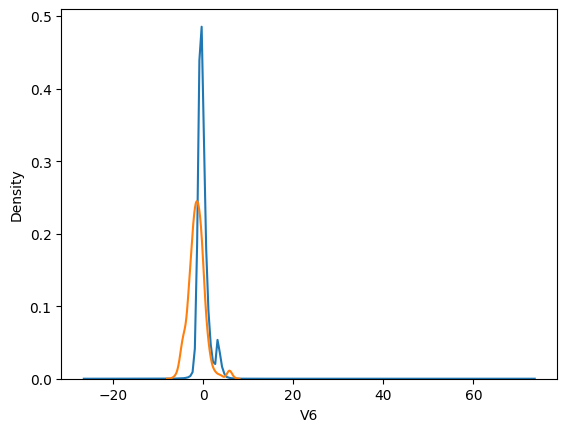

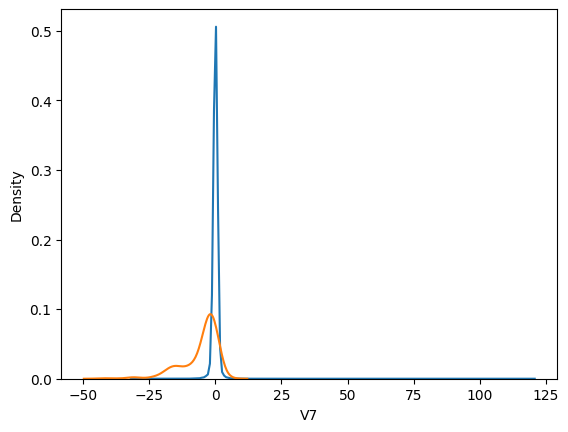

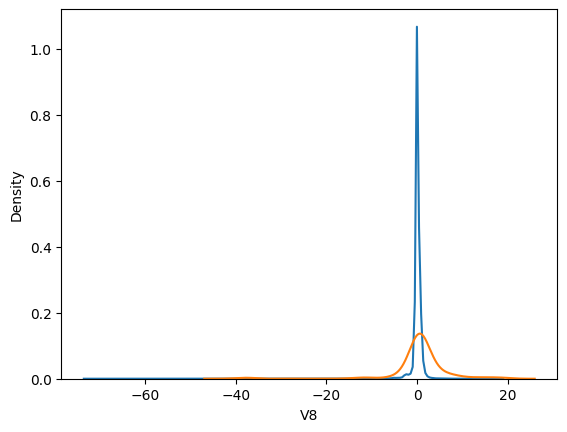

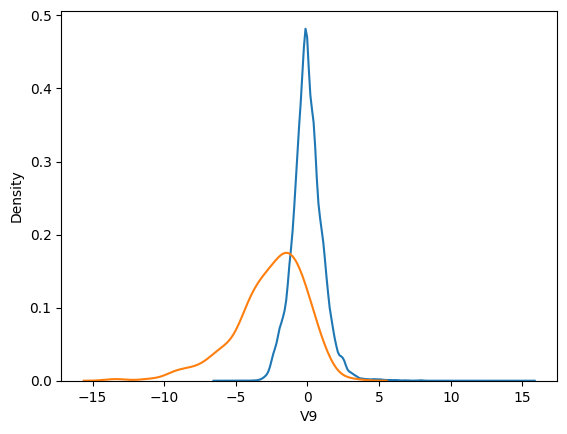

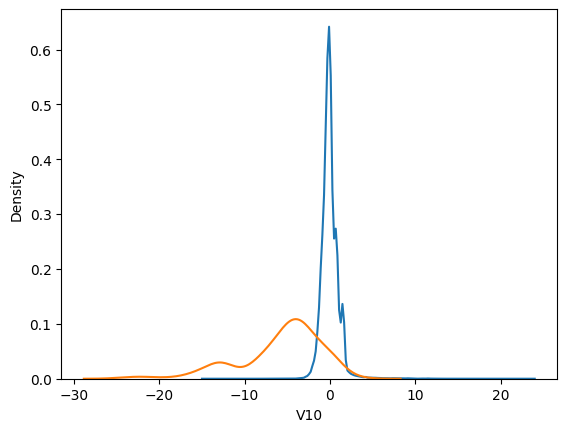

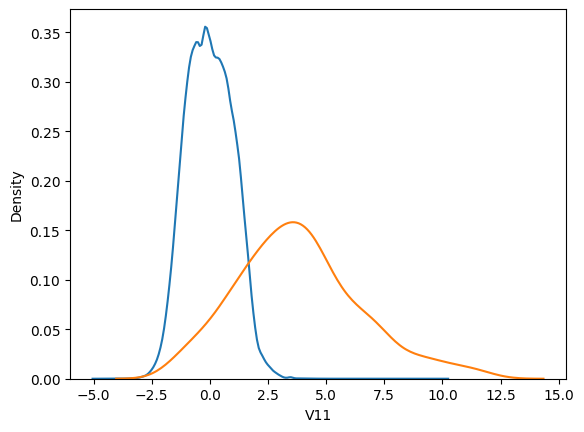

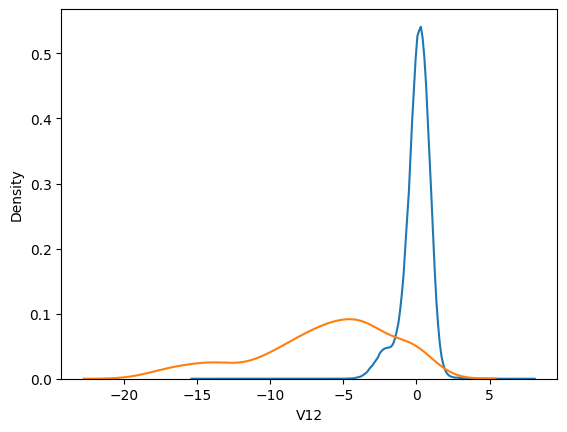

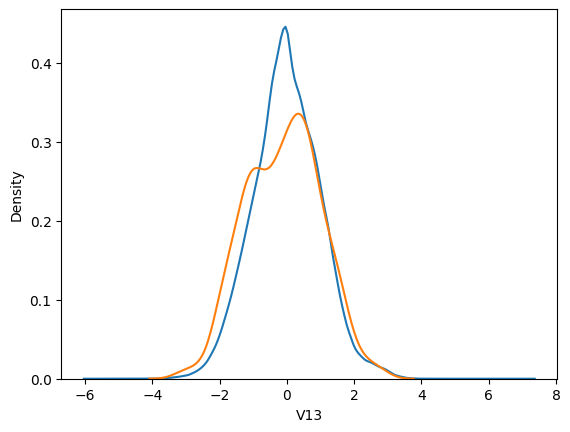

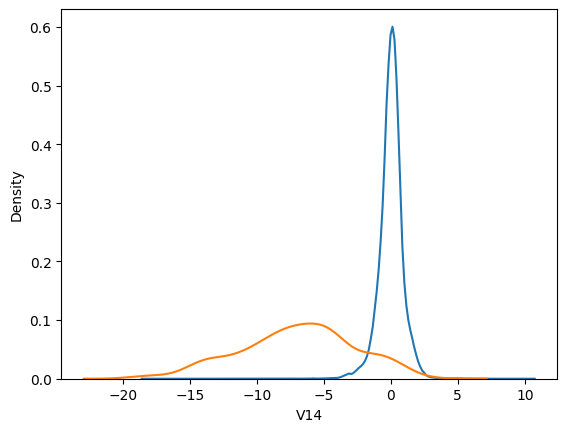

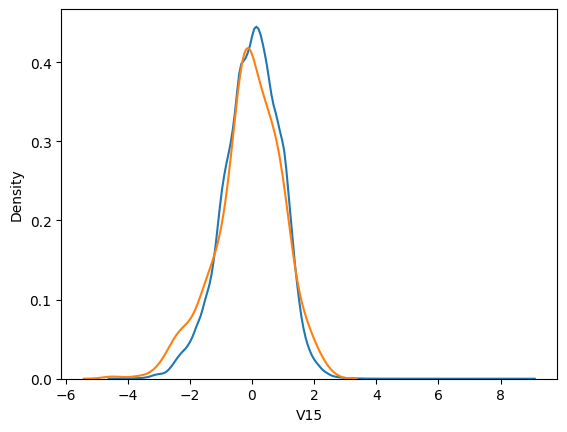

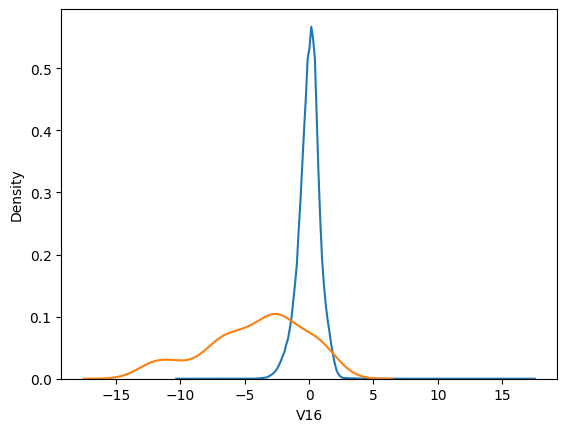

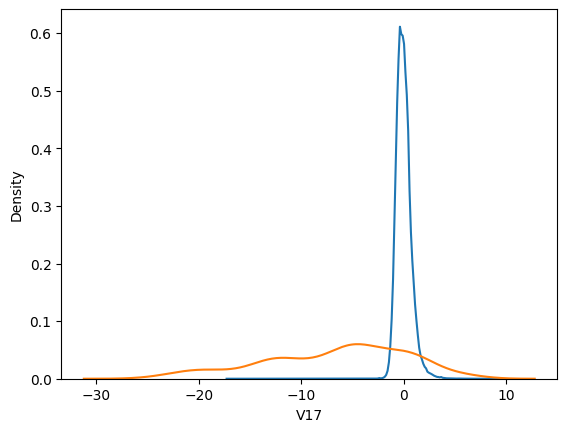

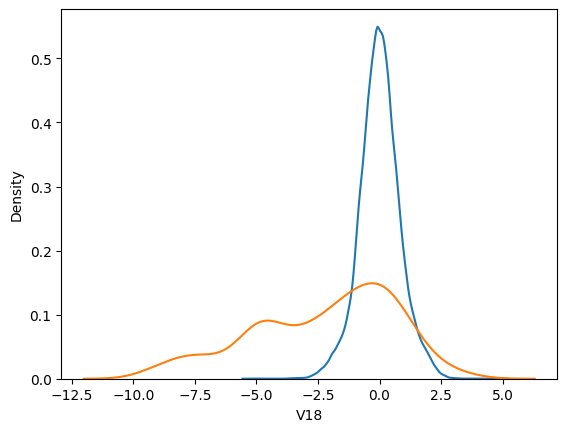

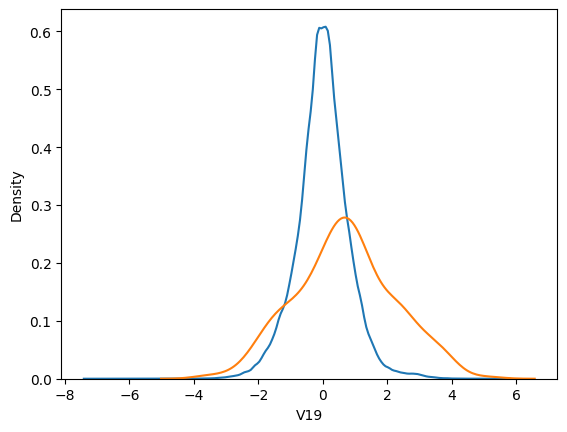

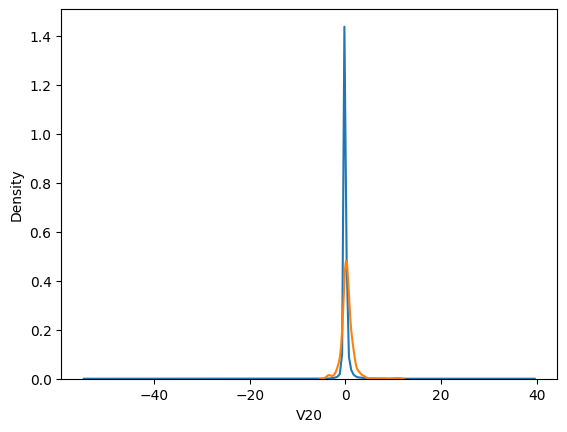

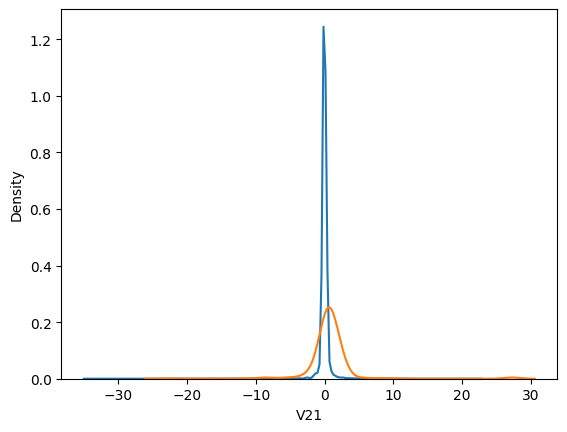

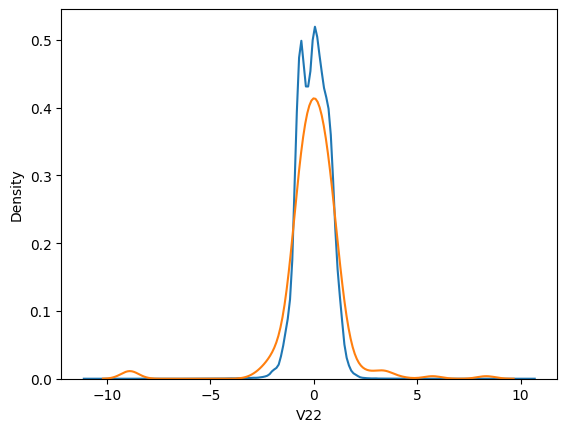

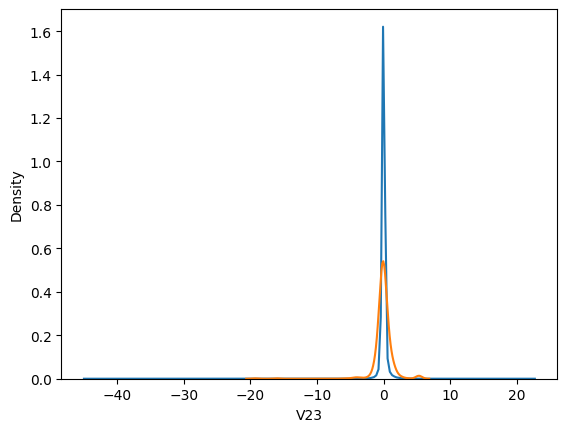

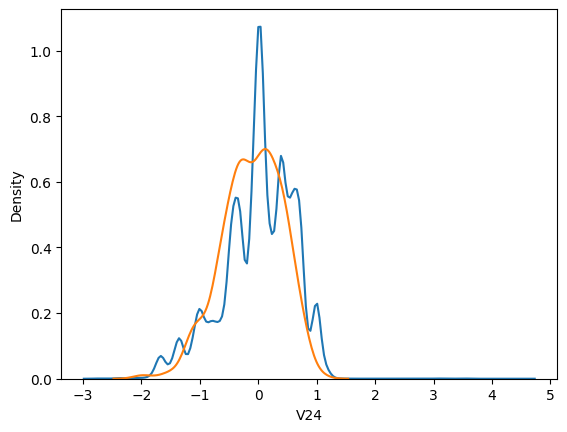

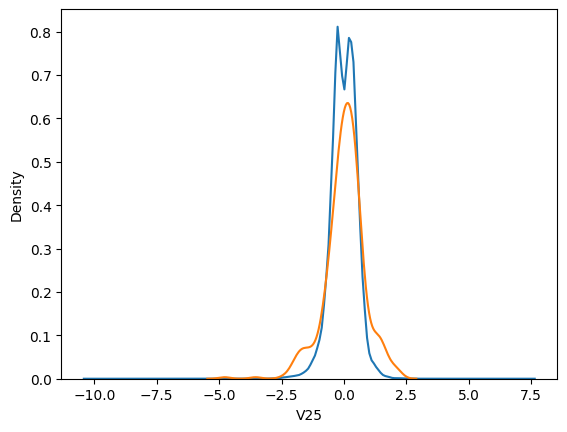

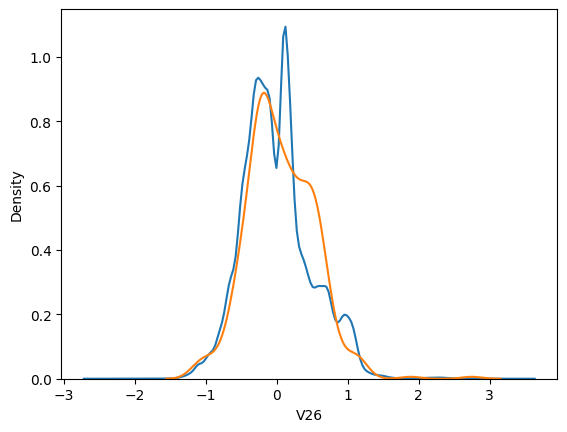

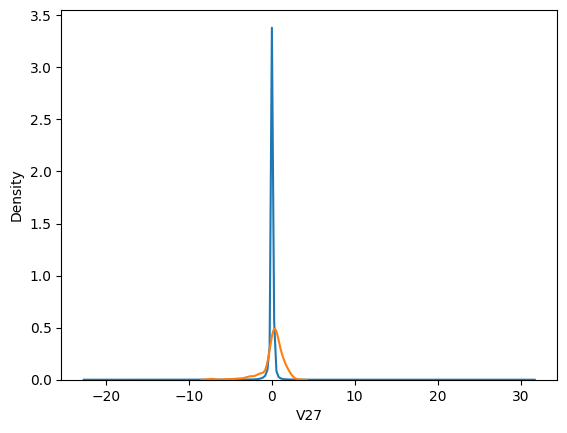

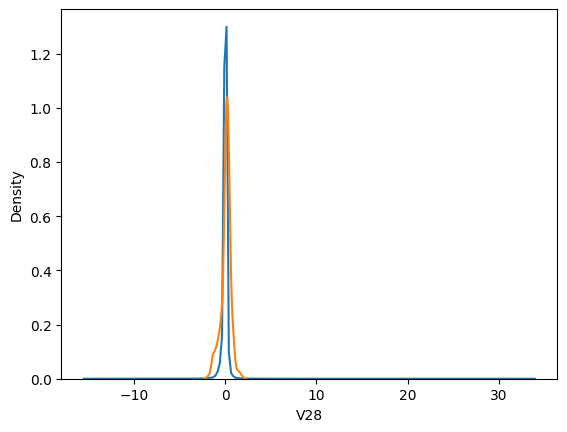

In [22]:
#Plotting the Kernel Distribution Estimate Plots, 
for j in list(dataset):
    for i in range(2):
        if(j in ('Time','Amount','Class')):
            continue
        else:
            sns.kdeplot(dataset[dataset.Class==i][j])
    plt.show()

In [23]:
#we have plotted the histogram plots for all the columns in the dataset, we have observed that there is skewness in some of the columns, i.e they are not gaussian To convert them into Gaussian we can apply POWER TRANSFORMERS on top of the dataset

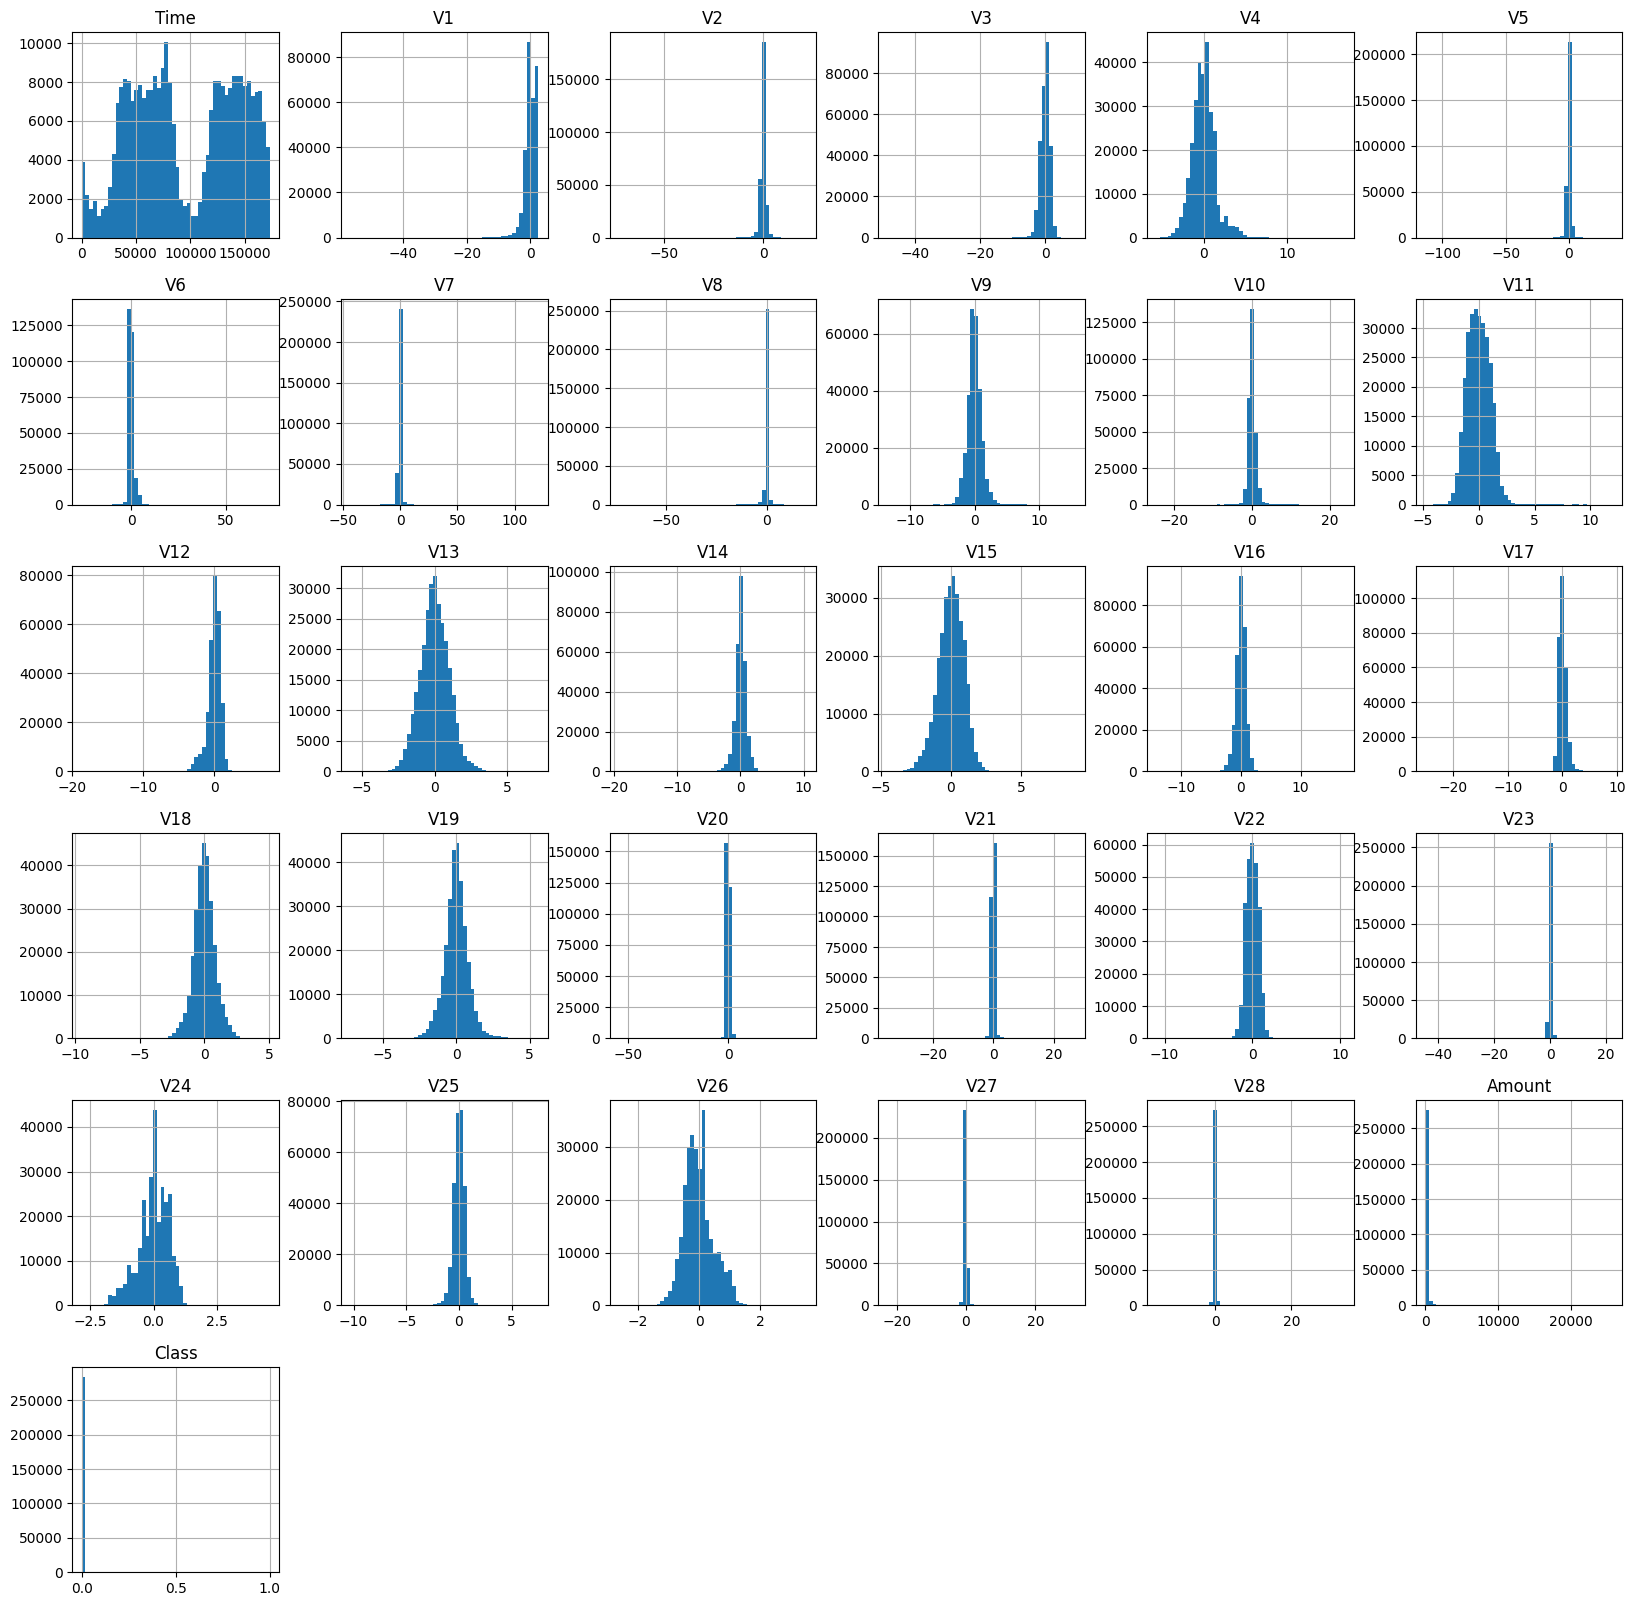

In [24]:
# Univariate Analysis of features
# Plotting histograms
dataset.hist(bins=50,figsize=(20,20))
plt.show()

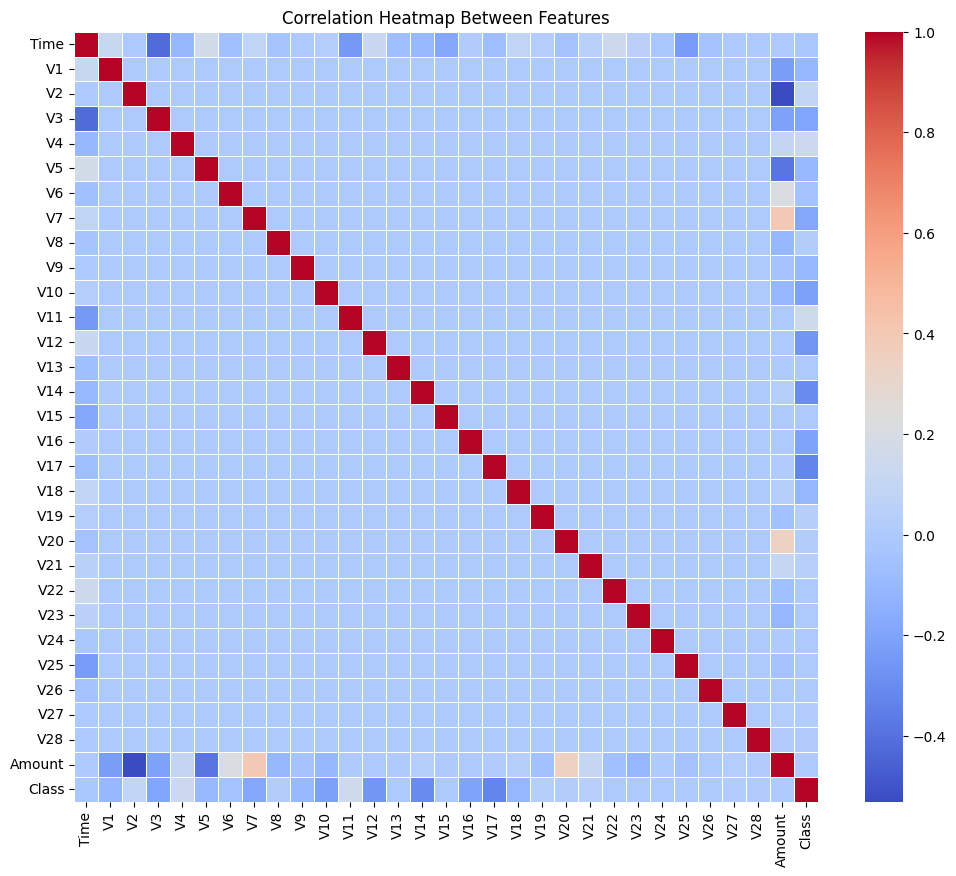

In [25]:
correlation_matrix = dataset.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Between Features')
plt.show()

In [39]:
# dividing data as dependent and independent variables
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [41]:
count = dataset['Amount'].value_counts(normalize=True).mul(100).reset_index(drop=False)
count.columns = ['classified_values','percent']
(count.pipe((sns.catplot,'data'), x='classified_values',y='percent',hue='percent',kind='bar'))

In [42]:
# test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [43]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [44]:
# training the model on randomforestclassification
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='entropy',n_estimators=100)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [45]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9995318516437859


In [47]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

rf_acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(rf_acc))
  
rf_prec = precision_score(y_test, y_pred)
print("The precision is {}".format(rf_prec))
  
rf_rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rf_rec))
  
rf_f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(rf_f1))
  
rf_MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is{}".format(rf_MCC))

The accuracy is 0.9995318516437859
The precision is 0.9130434782608695
The recall is 0.7777777777777778
The F1-Score is 0.84
The Matthews correlation coefficient is0.84247521334577


In [48]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[85298,    30],
       [   10,   105]], dtype=int64)

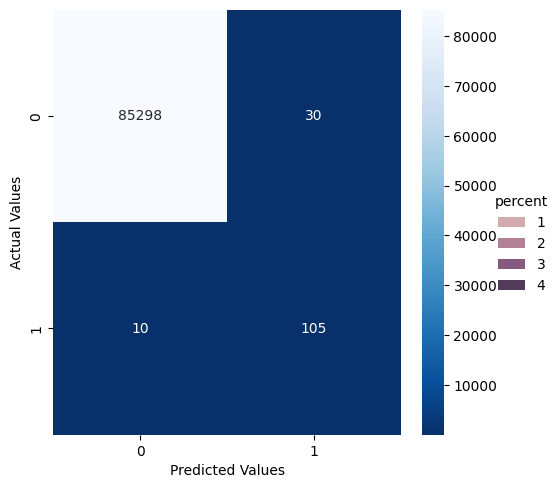

In [49]:
sns.heatmap(cm, annot=True, cmap='Blues_r' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [50]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred)

In [51]:
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.78      0.84       135

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

